In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 days 4 hours 56 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.605 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
### Understanding the dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Listing all columns

In [12]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [13]:
###: Setting response variable

In [14]:
response = "survived"

In [15]:
###: Setting response variable to enum or categorical so we can build a classification model

In [16]:
df[response] = df[response].asfactor()

In [17]:
###: Spliting the dataset into train and test 

In [18]:
train_df, test_df = df.split_frame(ratios=[0.9])

In [19]:
print(train_df.shape)
print(test_df.shape)

(1167, 14)
(142, 14)


In [20]:
###: Understanding Training dataset

In [21]:
train_df.describe()

Rows:1167
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,4.0,
mean,2.29648671808,,NaN,,29.9981382979,0.489288774636,0.384747215081,252612.167637,32.904380446,,,9.40909090909,162.769911504,
maxs,3.0,,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.834204253869,,NaN,,14.4055360562,1.02775217665,0.876728139284,453655.743615,50.7146162286,,,4.34386980344,98.9141952157,
zeros,0,,0,,0,796,894,0,14,,,0,0,
missing,0,0,0,0,227,0,0,308,1,902,2,815,1054,500
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [22]:
###: Understanding Test dataset

In [23]:
test_df.describe()

Rows:142
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.4167,0.0,0.0,1601.0,0.0,,,1.0,1.0,
mean,2.28169014085,,NaN,,28.8435537736,0.577464788732,0.387323943662,217720.428571,36.5068964789,,,9.36956521739,133.125,
maxs,3.0,,NaN,,74.0,8.0,4.0,3101281.0,512.3292,,,16.0,209.0,
sigma,0.87003869795,,NaN,,14.5110501882,1.15054069104,0.770452492534,331523.737485,59.751840531,,,4.50855333118,78.3644188574,
zeros,0,,0,,0,95,108,0,3,,,0,0,
missing,0,0,0,0,36,0,0,44,0,112,0,96,134,64
0,1.0,0,"Beattie, Mr. Thomson",male,36.0,0.0,0.0,13050.0,75.2417,C6,C,nan,nan,"Winnipeg, MN"
1,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369.0,30.0,C148,C,5.0,nan,"New York, NY"
2,1.0,1,"Bishop, Mr. Dickinson H",male,25.0,1.0,0.0,11967.0,91.0792,B49,C,7.0,nan,"Dowagiac, MI"


In [24]:
###: Training and test dataset - columns and rows details

In [25]:
print(train_df.shape)
print(test_df.shape)

(1167, 14)
(142, 14)


In [26]:
###: Training and Test Dataframes - columns names

In [27]:
print(train_df.col_names)
print(test_df.col_names)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']
[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [28]:
###: Settings all features for supervised machine learning

In [29]:
features = train_df.col_names
print(features)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [30]:
###: Creating a list of all features we will use for machine learning

In [31]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [32]:
###: Ignoring other features which are not needed for training

In [33]:
for feature_name in ['name', 'ticket', 'home.dest']:
    features.remove(feature_name)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [34]:
###: Understanding response variable values as historgram in Training data

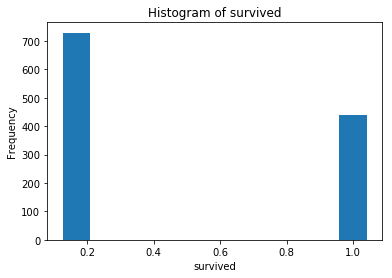

In [35]:
train_df[response].asnumeric().hist()

In [37]:
###: Importing H2O H2ODeepLearningEstimator to build Deep Learning Model

In [38]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [39]:
###:Building Deep Learning -  Classification model with cross validation

In [40]:
dl_model_with_cv = H2ODeepLearningEstimator(nfolds=5)

In [41]:
###: Training the model

In [42]:
dl_model_with_cv.train(x = features, y = response, training_frame=train_df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [43]:
###: Getting model performance

In [45]:
dl_model_with_cv.model_performance(valid=True,test_data=test_df).auc()

0.8923387096774194

In [46]:
###:Building Deep Learning Classification model with cross validation and key Deep Learning parameters configuration

In [50]:
dl_model_cv_config = H2ODeepLearningEstimator(nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345)

In [51]:
###: Training Deep Learning Model

In [52]:
dl_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "dl_model_with_training_and_validtion_python")

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [53]:
###: Getting Deep Learning model performance on test data

In [54]:
dl_model_cv_config.model_performance(valid=True,test_data=test_df).auc()

0.8997983870967742

In [55]:
###: Importing H2O Grid Library

In [56]:
from h2o.grid import H2OGridSearch

In [58]:
###: Settings Deep Learning grid parameters

In [59]:
dl_hyper_params = {"hidden": [10,20,30],
                "epochs": [ 10, 15, 20],
                "score_training_samples": [10, 20, 30],
                "train_samples_per_iteration": [5,10,20]}

In [60]:
###: Setting H2O Grid Search Criteria

In [61]:
grid_search_criteria = { 'strategy': "RandomDiscrete", 
                    'seed': 123,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }

In [62]:
###: Finalzing the H2O Grid searching settings

In [67]:
dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator(
                                                    nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345),
                     hyper_params=dl_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="titnaic_dl_grid")

In [68]:
###: Finally training H2O Grid with data 

In [69]:
dl_grid.train(x=features, y=response, training_frame=train_df)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [70]:
###: Finally getting total count of DL models

In [71]:
len(dl_grid)

81

In [72]:
###: Defining a function to find the best model from the grid based on r2 or auc

In [73]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [74]:
###: Applying the function to get the best model from the grid

In [75]:
best_model = find_best_model_from_grid(dl_grid, "auc")

Model ID with best R2: titnaic_dl_grid_model_45
Best AUC: 1.0


In [76]:
###: Getting the best model performance on test data

In [77]:
best_model.model_performance(valid=True,test_data=test_df).auc()

0.9151209677419354

In [78]:
###: Performing predictions with one of the above model

In [80]:
dl_predictions = best_model.predict(test_df)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [82]:
dl_predictions

predict,p0,p1
0,0.888815,0.111185
1,0.0134752,0.986525
1,0.261938,0.738062
0,0.630362,0.369638
0,0.872941,0.127059
1,0.00071294,0.999287
0,0.944677,0.055323
0,0.916538,0.0834623
0,0.756722,0.243278
0,0.95486,0.0451404


In [83]:
###: Understanding/Validating predictions based on prediction results historgram

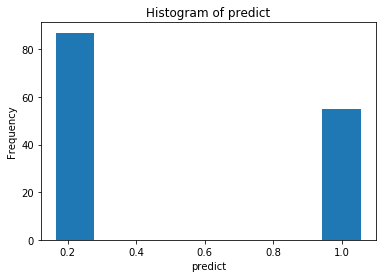

In [84]:
dl_predictions['predict'].asnumeric().hist()

In [85]:
###: Getting Scoring History

In [86]:
best_model.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-23 00:23:51,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN
1,,2017-11-23 00:23:51,3 min 5.972 sec,9000 obs/sec,0.007712,1,9.0,0.786347,2.255278,0.885942,3.230769,0.142857
2,,2017-11-23 00:23:52,3 min 7.585 sec,14494 obs/sec,20.009426,2344,23351.0,0.172085,0.119072,1.000000,3.230769,0.000000


In [87]:
###: Getting GBM model variable importance 

In [88]:
best_model.varimp()

[(u'boat', 1.0, 1.0, 0.019625083188030055),
 (u'cabin.C93', 0.351115882396698, 0.351115882396698, 0.006890678400673775),
 (u'embarked.C',
  0.32677406072616577,
  0.32677406072616577,
  0.006412968125441388),
 (u'cabin.E60', 0.32279011607170105, 0.32279011607170105, 0.00633478288018101),
 (u'parch', 0.32213109731674194, 0.32213109731674194, 0.006321849582292466),
 (u'cabin.C123', 0.3115446865558624, 0.3115446865558624, 0.006114090390447548),
 (u'cabin.C87', 0.3065374493598938, 0.3065374493598938, 0.006015822943934466),
 (u'cabin.B78',
  0.30583781003952026,
  0.30583781003952026,
  0.006002092464070519),
 (u'sex.male', 0.30451783537864685, 0.30451783537864685, 0.005976187851544786),
 (u'cabin.A5', 0.3044489324092865, 0.3044489324092865, 0.005974835625039187),
 (u'cabin.B19', 0.3044120967388153, 0.3044120967388153, 0.005974112721941903),
 (u'cabin.C126', 0.3019355535507202, 0.3019355535507202, 0.005925510355856788),
 (u'cabin.B28',
  0.30192098021507263,
  0.30192098021507263,
  0.00592

In [89]:
###: Getting model variable importance PLOT

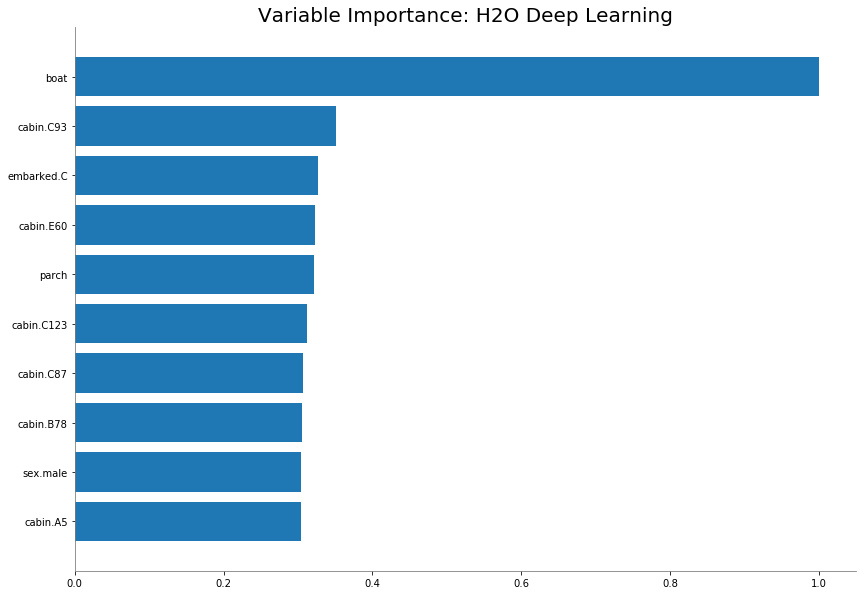

In [90]:
best_model.varimp_plot()